In [74]:
import pandas as pd
import uproot as ur
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx

In [179]:
#file = ur.open('/home/jmsardain/JetCalib/Akt4EMTopo.topo_cluster.root')["ClusterTree"]
file = pd.read_csv('./fracdata.csv',' ')

#df = file.arrays(library="pd")
df1 = file.head(80000)
#df1.columns
df1.keys()

/tmp/ipykernel_4295/3536740054.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  file = pd.read_csv('./fracdata.csv',' ')


Index(['seqNumber', 'runNumber', 'eventNumber', 'avgMu', 'nPrimVtx', 'jetCnt',
       'jetCalE', 'jetCalPt', 'jetCalEta', 'jetCalPhi', 'jetRawE', 'jetRawPt',
       'jetRawEta', 'jetRawPhi', 'jetNConst', 'truthJetMatchRadius',
       'truthJetE', 'truthJetPt', 'truthJetRap', 'truthJetPhi', 'nCluster',
       'clusterIndex', 'cluster_nCells', 'cluster_nCells_tot', 'clusterECalib',
       'clusterPtCalib', 'clusterEtaCalib', 'clusterPhiCalib',
       'cluster_sumCellECalib', 'cluster_fracECalib', 'cluster_fracECalib_ref',
       'clusterE', 'clusterPt', 'clusterEta', 'clusterPhi', 'cluster_sumCellE',
       'cluster_time', 'cluster_fracE', 'cluster_fracE_ref',
       'cluster_EM_PROBABILITY', 'cluster_HAD_WEIGHT', 'cluster_OOC_WEIGHT',
       'cluster_DM_WEIGHT', 'cluster_ENG_CALIB_TOT', 'cluster_ENG_CALIB_OUT_T',
       'cluster_ENG_CALIB_OUT_L', 'cluster_ENG_CALIB_OUT_M',
       'cluster_ENG_CALIB_DEAD_T', 'cluster_ENG_CALIB_DEAD_L',
       'cluster_ENG_CALIB_DEAD_M', 'cluster_ENG_CALI

In [180]:
df1 = file.head(70000)


In [181]:
clusterE = [] 
clusterEta = []
cluster_time = []
labels = [] 
test = []
df = df1
#df1[[ 'eventNumber','jetCnt']][:35]

In [182]:
#for event in eventNumbers:
tempE = []
tempEta = []
temp_time = []
temp_labels = []
count_jets = 1
old_event = df1['jetCnt'][0]
old_jetCnt = df1['jetCnt'][0]
change_bol = False

clusterE = []
clusterEta = []
cluster_time = []
labels = []

for index,row in df1.iterrows():
    
    if old_jetCnt != row['jetCnt']:
        old_jetCnt = row['jetCnt']
        count_jets = +1
        #print(count_jets)
        if count_jets == 1:
            clusterE.append(tempE)
            clusterEta.append(tempEta)
            cluster_time.append(temp_time)
            labels.append(temp_labels)
            #print( len(tempEta) )
            tempE = []
            tempEta = []
            temp_time = []
            temp_labels = []
    if old_event != row['eventNumber']:
        old_event = row['eventNumber']
        count_jets = 0
        #change = False
        
    #a = list(df[df["eventNumber"]==event].clusterE.values)
    #b = list(df[df["eventNumber"]==event].clusterEtaCalib.values)
    #c = list(df[df["eventNumber"]==event].cluster_time.values)
    #d = list(np.where(np.array(df[df["eventNumber"]==event].cluster_ENG_CALIB_TOT.values) == 0, 1, 0))
    #clusterE.append(a)
    #clusterEta.append(b)
    #cluster_time.append(c)
    #labels.append(d)
    tempE.append(row['clusterE'])
    tempEta.append(row['clusterEtaCalib'])
    temp_time.append(row['cluster_time'])
    temp_labels.append( float(row['cluster_ENG_CALIB_TOT'] <= 0) )

        

In [183]:
#labels

In [184]:
## create Dictionary containing data and labels

Dictionary_data ={
    "0": clusterE,
    "1": clusterEta,
    "2": cluster_time,
    "label": labels
}

In [185]:
''' 
clusterE = [] 
clusterEta = []
cluster_time = []
labels = [] 
test = []

eventNumbers =np.array(df.eventNumber.drop_duplicates() )

for event in eventNumbers:
    a = list(df[df["eventNumber"]==event].clusterE.values)
    b = list(df[df["eventNumber"]==event].clusterEtaCalib.values)
    c = list(df[df["eventNumber"]==event].cluster_time.values)
    d = list(np.where(np.array(df[df["eventNumber"]==event].cluster_ENG_CALIB_TOT.values) <= 0, 1, 0))
    clusterE.append(a)
    clusterEta.append(b)
    cluster_time.append(c)
    labels.append(d)
    pass
labels[4]
'''

' \nclusterE = [] \nclusterEta = []\ncluster_time = []\nlabels = [] \ntest = []\n\neventNumbers =np.array(df.eventNumber.drop_duplicates() )\n\nfor event in eventNumbers:\n    a = list(df[df["eventNumber"]==event].clusterE.values)\n    b = list(df[df["eventNumber"]==event].clusterEtaCalib.values)\n    c = list(df[df["eventNumber"]==event].cluster_time.values)\n    d = list(np.where(np.array(df[df["eventNumber"]==event].cluster_ENG_CALIB_TOT.values) <= 0, 1, 0))\n    clusterE.append(a)\n    clusterEta.append(b)\n    cluster_time.append(c)\n    labels.append(d)\n    pass\nlabels[4]\n'

In [186]:
df[df["eventNumber"]==47081045].clusterE.values

array([2.7440133 , 1.6610148 , 1.6529996 , 1.4050152 , 1.2900134 ,
       1.2870045 , 1.1670034 , 0.82288015, 0.7999947 , 0.6720199 ,
       0.667981  , 0.568002  , 0.55521667, 0.54399884, 0.533003  ,
       0.4959971 , 0.48599795, 0.4459959 , 0.39900026, 0.3789966 ,
       0.3120201 , 0.2181782 , 0.11699598])

In [188]:
import torch
from torch_geometric.data import Data

graph_list = []
for i in range(len(clusterE)):
    num_nodes = len(clusterE[i])
    edge_index = torch.tensor([[i, j] for i in range(num_nodes) for j in range(i+1, num_nodes)], dtype=torch.long).t().contiguous()
    #print(edge_index)
    vec = []
    vec.append(np.array([clusterE[i], clusterEta[i], cluster_time[i]]).T)
    x = torch.tensor(vec, dtype=torch.float)
    
    #graph = Data(x=x, edge_index=edge_index, y=labels[i])
    graph = Data(x=x, edge_index=edge_index, y=torch.tensor(labels[i], dtype=torch.float))
    graph_list.append(graph)

# Printing the graph list
for idx, graph in enumerate(graph_list):
    if idx>3: continue
    print(f"Graph {idx+1}:")
    print(graph)
    print()

Graph 1:
Data(x=[1, 23, 3], edge_index=[2, 253], y=[23])

Graph 2:
Data(x=[1, 16, 3], edge_index=[2, 120], y=[16])

Graph 3:
Data(x=[1, 12, 3], edge_index=[2, 66], y=[12])

Graph 4:
Data(x=[1, 20, 3], edge_index=[2, 190], y=[20])



In [189]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
class GCNModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = nn.functional.sigmoid(x)
        #print("len->",len(x))
        #print(x)
        return x

# class GCNModel(nn.Module):
#     def __init__(self, in_channels, hidden_channels, num_classes):
#         super(GCNModel, self).__init__()
#         self.conv1 = GCNConv(in_channels, hidden_channels)
#         self.conv2 = GCNConv(hidden_channels, num_classes)

#     def forward(self, x_batch, edge_index_batch):
#         x_batch = self.conv1(x_batch, edge_index_batch)
#         x_batch = torch.relu(x_batch)
#         x_batch = self.conv2(x_batch, edge_index_batch)
#         return x_batch
        
# Initialize model, optimizer, and loss function
#model = GCNModel(in_channels=3, hidden_channels=64, num_classes=2)
model = GCNModel(in_channels=3, hidden_channels=64, num_classes=1)

optimizer = optim.Adam(model.parameters(), lr=0.002)
criterion = nn.CrossEntropyLoss()

In [190]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion.to(device)

CrossEntropyLoss()

In [192]:
len(graph_list)

4305

In [203]:
size_train = 0.8
graphs_test = graph_list[int(len(graph_list)*size_train) : int(len(graph_list))]
graph_list = graph_list[0 : int(len(graph_list)*size_train) ]

In [208]:
len(graph_list)

3444

In [209]:
len(graphs_test)

861

In [174]:
from torch.utils.data import DataLoader
dataloader = DataLoader(graph_list, batch_size=512*2, shuffle=True)

In [175]:
'''  
# Training loop
for epoch in range(30):
    for data in graph_list:
        data = data.to(device)
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        out = out.view(-1, out.shape[-1])
        labels = torch.tensor(data.y, dtype=torch.long).to(device) 
        print(out.shape)
        #print(labels.shape)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
''' 

'  \n# Training loop\nfor epoch in range(30):\n    for data in graph_list:\n        data = data.to(device)\n        model.train()\n        optimizer.zero_grad()\n        out = model(data.x, data.edge_index)\n        out = out.view(-1, out.shape[-1])\n        labels = torch.tensor(data.y, dtype=torch.long).to(device) \n        print(out.shape)\n        #print(labels.shape)\n        loss = criterion(out, labels)\n        loss.backward()\n        optimizer.step()\n'

In [176]:
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    
    for data in graph_list:
        data = data.to(device)  # Move batch data to the same device as model
        
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        out = out.view(-1, out.shape[-1])
        
        #labels = torch.tensor(data.y, dtype=torch.long).to(device) 
        labels = torch.tensor(data.y, dtype=torch.float).to(device) 
        labels = torch.reshape(labels, (int(list(labels.shape)[0]),1))
        
        #print(out.dtype)
        #print(labels.dtype)
        #loss = criterion(out, labels)
        loss = torch.nn.functional.binary_cross_entropy(out, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')



/tmp/ipykernel_4295/108056798.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(data.y, dtype=torch.float).to(device)


Epoch [1/30], Loss: 1702.9592
Epoch [2/30], Loss: 1636.3002
Epoch [3/30], Loss: 1608.3617
Epoch [4/30], Loss: 1593.6787
Epoch [5/30], Loss: 1587.8772
Epoch [6/30], Loss: 1587.0412
Epoch [7/30], Loss: 1584.5668
Epoch [8/30], Loss: 1578.4647
Epoch [9/30], Loss: 1572.6481
Epoch [10/30], Loss: 1566.0281
Epoch [11/30], Loss: 1559.9377
Epoch [12/30], Loss: 1554.7175
Epoch [13/30], Loss: 1550.0015
Epoch [14/30], Loss: 1545.6404
Epoch [15/30], Loss: 1541.8361
Epoch [16/30], Loss: 1538.6231
Epoch [17/30], Loss: 1535.8900
Epoch [18/30], Loss: 1533.6053
Epoch [19/30], Loss: 1531.0526
Epoch [20/30], Loss: 1529.4057
Epoch [21/30], Loss: 1527.4401
Epoch [22/30], Loss: 1525.7395
Epoch [23/30], Loss: 1524.3168
Epoch [24/30], Loss: 1523.0594
Epoch [25/30], Loss: 1521.9392
Epoch [26/30], Loss: 1520.9237
Epoch [27/30], Loss: 1520.0246
Epoch [28/30], Loss: 1519.2035
Epoch [29/30], Loss: 1518.4352
Epoch [30/30], Loss: 1517.7678


In [213]:
epoch_loss = 0.0
model.eval()
nodes_out = torch.tensor([])
labels_test = torch.tensor([])

for data in graphs_test:
    data = data.to(device)  # Move batch data to the same device as model
    out = model(data.x, data.edge_index)
    out = out.view(-1, out.shape[-1])
    #labels = torch.tensor(data.y, dtype=torch.long).to(device) 
    labels = torch.tensor(data.y, dtype=torch.float).to(device) 
    labels = torch.reshape(labels, (int(list(labels.shape)[0]),1))
    
    nodes_out = torch.cat((nodes_out, out), 0)
    labels_test = torch.cat((labels_test, labels), 0)
    
    #loss = criterion(out, labels)
    loss = torch.nn.functional.binary_cross_entropy(out, labels)
    
    epoch_loss += loss.item()
    
print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

/tmp/ipykernel_4295/2230891263.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(data.y, dtype=torch.float).to(device)


Epoch [30/30], Loss: 1012.6518


In [214]:
nodes_out

tensor([[0.5004],
        [0.4874],
        [0.4793],
        ...,
        [0.8667],
        [0.8661],
        [0.8657]], grad_fn=<CatBackward0>)

In [222]:
nodes_out[labels_test<0.5]

tensor([0.5004, 0.4874, 0.4793,  ..., 0.8667, 0.8661, 0.8657],
       grad_fn=<IndexBackward0>)

In [221]:
nodes_out[labels_test>0.5]

tensor([0.4792, 0.5278, 0.5636,  ..., 0.9024, 0.5193, 0.8711],
       grad_fn=<IndexBackward0>)

In [228]:
print("mean Pileup->",torch.mean(nodes_out[labels_test>0.5]), "\n" , "mean NoPileup->",torch.mean(nodes_out[labels_test<0.5]))

mean Pileup-> tensor(0.6380, grad_fn=<MeanBackward0>) 
 mean NoPileup-> tensor(0.5916, grad_fn=<MeanBackward0>)


In [229]:
def VecROC(VEC):
    VEC_sum=0
    bkg_sum=0
    VEC_out = np.zeros(len(VEC))
    #for i in range (len(VEC)-1,-1,-1 ):
    for i in range (0,len(VEC),1 ):
        VEC_sum += VEC[i]
        #VEC_out.append(VEC_sum) 
        VEC_out[i] = VEC_sum
    return VEC_out/VEC_sum

number_bins = 100

out_NoPile = nodes_out[labels_test<0.5].detach().numpy()
out_Pile = nodes_out[labels_test>0.5].detach().numpy()

hist_NoPile = np.histogram( out_NoPile , bins=number_bins , range=(0,1) )#, weights = weight_good  )
hist_Pile = np.histogram( out_Pile , bins=number_bins , range=(0,1) )

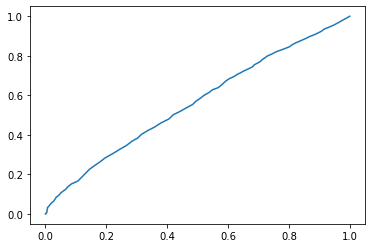

In [230]:
import matplotlib.pyplot as plt
ROC_NoPile = VecROC(hist_NoPile[0])
ROC_Pile = VecROC(hist_Pile[0])
fig, ax = plt.subplots()
ax.plot(ROC_Pile, ROC_NoPile)
plt.show()

In [ ]:
len(list(np.where(np.array(df[df["eventNumber"]==47081807].cluster_ENG_CALIB_TOT.values) == 0, 1, 0)))

In [ ]:
eventNumbers